## Task 1 - Entropy and Information Gain

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# To read data using pandas library
df = pd.read_csv('samplecar.csv')   

In [4]:
df.head()

,Type,Price,Buy
0,SUV,H,No
1,HB,H,No
2,HB,H,Yes
3,HB,L,No
4,SEDAN,H,Yes


In [5]:
df['Buy'].nunique()

2

In [45]:
# identify features and target
features = df.drop('Buy', axis=1)
target = df['Buy']

# sanity check
assert features.shape[0] == target.shape[0], " len(features) == len(target)"

In [46]:
features

,Type,Price
0,SUV,H
1,HB,H
2,HB,H
3,HB,L
4,SEDAN,H
5,SEDAN,L
6,SUV,L
7,SEDAN,H
8,HB,L
9,SUV,Hot


In [47]:
target

0     No
1     No
2    Yes
3     No
4    Yes
5    Yes
6     No
7    Yes
8    Yes
9    Yes
Name: Buy, dtype: object

In [48]:
type(target)

pandas.core.series.Series

In [49]:
df['Buy'].value_counts()

Yes    6
No     4
Name: Buy, dtype: int64

In [50]:
 df.dtypes

Type     object
Price    object
Buy      object
dtype: object

### Entropy calculation of dataset

In [51]:
# Function made for entropy
def entropy(pvl):
    entropy_value = 0
    
    for i in [pvl]:
        if i == 0:
            return 0
        entropy_value += -1*(i*np.log2(i))
        
    return entropy_value

In [52]:
total_df = len(df)
no_value = df[df['Buy'] == "No"].shape[0]
yes_value = df[df['Buy'] == "Yes"].shape[0]
prob_no = no_value/total_df
prob_yes = yes_value/total_df
print(prob_yes, prob_no)
#Redirecting above entropy function
H_df = -(-entropy(prob_yes) - entropy(prob_no))  
H_df

0.6 0.4


0.9709505944546686

### Entropy calculation of Type column

In [53]:
Type = df["Type"].unique()
Type

array(['SUV', 'HB', 'SEDAN'], dtype=object)

In [54]:
#Entropy calculation of SUV
SUV = df[df["Type"] == "SUV"]
print(SUV.head())

total_SUV = len(SUV)
total_SUV_yes = SUV[SUV["Buy"] == "Yes"].shape[0]
total_SUV_no = SUV[SUV["Buy"] == "No"].shape[0]
prob_SUV_yes = total_SUV_yes/total_SUV
prob_SUV_no = total_SUV_no/total_SUV
H_SUV = -(-entropy(prob_SUV_yes) - entropy(prob_SUV_no))
print(H_SUV)


p_SUV = len(SUV) / len(df)
print("Probability of SUV = "+str(p_SUV))

  Type Price  Buy
0  SUV     H   No
6  SUV     L   No
9  SUV   Hot  Yes
0.9182958340544896
Probability of SUV = 0.3


In [55]:
# Entropy calculation of HB
HB = df[df["Type"] == "HB"]
print(HB.head())

total_HB = len(HB)
total_HB_yes = HB[HB["Buy"] == "Yes"].shape[0]
total_HB_no = HB[HB["Buy"] == "No"].shape[0]
prob_HB_yes = total_HB_yes/total_HB
prob_HB_no = total_HB_no/total_HB
H_HB = -(-entropy(prob_HB_yes) - entropy(prob_HB_no))
print(H_HB)

p_HB = len(HB) / len(df)
print("Probability of HB = "+str(p_HB))

  Type Price  Buy
1   HB     H   No
2   HB     H  Yes
3   HB     L   No
8   HB     L  Yes
1.0
Probability of HB = 0.4


In [56]:
# Entropy calculation of SEDAN
SEDAN = df[df["Type"] == "SEDAN"]
print(SEDAN.head())

total_SEDAN = len(SEDAN)
total_SEDAN_yes = SEDAN[SEDAN["Buy"] == "Yes"].shape[0]
total_SEDAN_no = SEDAN[SEDAN["Buy"] == "No"].shape[0]
prob_SEDAN_yes = total_SEDAN_yes/total_SEDAN
prob_SEDAN_no = total_SEDAN_no/total_SEDAN
H_SEDAN = -(-entropy(prob_SEDAN_yes) - entropy(prob_SEDAN_no))
print(H_SEDAN)


p_SEDAN = len(SEDAN) / len(df)
print("Probability of SEDAN = "+str(p_SEDAN))

    Type Price  Buy
4  SEDAN     H  Yes
5  SEDAN     L  Yes
7  SEDAN     H  Yes
0.0
Probability of SEDAN = 0.3


In [57]:
Price = df["Price"].unique()
Price

array(['H', 'L', 'Hot'], dtype=object)

### Entropy calculation of price column

In [58]:
#Entropy calculation of H
price_H = df[df["Price"] == "H"]
print(price_H.head())

total_H = len(price_H)
total_H_yes = price_H[price_H["Buy"] == "Yes"].shape[0]
total_H_no = price_H[price_H["Buy"] == "No"].shape[0]
prob_H_yes = total_H_yes/total_H
prob_H_no = total_H_no/total_H
H_H = -(-entropy(prob_H_yes) - entropy(prob_H_no))
print(H_H)


p_H = len(price_H) / len(df)
print("Probability of H = "+str(p_H))

    Type Price  Buy
0    SUV     H   No
1     HB     H   No
2     HB     H  Yes
4  SEDAN     H  Yes
7  SEDAN     H  Yes
0.9709505944546686
Probability of H = 0.5


In [59]:
#Entropy calculation of H
price_L = df[df["Price"] == "L"]
print(price_L.head())

total_L = len(price_L)
total_L_yes = price_L[price_L["Buy"] == "Yes"].shape[0]
total_L_no = price_L[price_L["Buy"] == "No"].shape[0]
prob_L_yes = total_L_yes/total_L
prob_L_no = total_L_no/total_L
H_L = -(-entropy(prob_L_yes) - entropy(prob_L_no))
print(H_L)


p_L = len(price_L) / len(df)
print("Probability of L = "+str(p_L))

    Type Price  Buy
3     HB     L   No
5  SEDAN     L  Yes
6    SUV     L   No
8     HB     L  Yes
1.0
Probability of L = 0.4


Low entropy is better than higher one. High randomess is not suitable for our system.

### Information Gain

In [60]:
# total information for type attribute
I_T = p_SUV * H_SUV + p_HB * H_HB + p_SEDAN * H_SEDAN
I_T

0.6754887502163469

In [61]:
# information gain for type attribute
Information_Gain = H_df - I_T
Information_Gain

0.29546184423832167

In [62]:
# total information for price attribute
I_P = p_H * H_H + p_L * H_L
I_P

0.8854752972273343

In [63]:
# information gain for price attribute
Information_Gain = H_df - I_P
Information_Gain

0.08547529722733427

High number of information gain is better than low .

## Task 2 - Random Forest Regressor

In [64]:
df2 = pd.read_csv('house_data.csv')
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1180,1955
1,538000.0,3,2.25,2570,7242,2.0,2170,1951
2,180000.0,2,1.00,770,10000,1.0,770,1933
3,604000.0,4,3.00,1960,5000,1.0,1050,1965
4,510000.0,3,2.00,1680,8080,1.0,1680,1987


In [65]:
df2.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
sqft_above       int64
yr_built         int64
dtype: object

In [67]:
# trying to figure out if there is nan values.we need to remove incase of their presence
df2.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
sqft_above     0
yr_built       0
dtype: int64

In [69]:
df2.isna()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
21570,False,False,False,False,False,False,False,False
21571,False,False,False,False,False,False,False,False
21572,False,False,False,False,False,False,False,False
21573,False,False,False,False,False,False,False,False


In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21575 entries, 0 to 21574
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21575 non-null  float64
 1   bedrooms     21575 non-null  int64  
 2   bathrooms    21575 non-null  float64
 3   sqft_living  21575 non-null  int64  
 4   sqft_lot     21575 non-null  int64  
 5   floors       21575 non-null  float64
 6   sqft_above   21575 non-null  int64  
 7   yr_built     21575 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


Text(0, 0.5, 'Count')

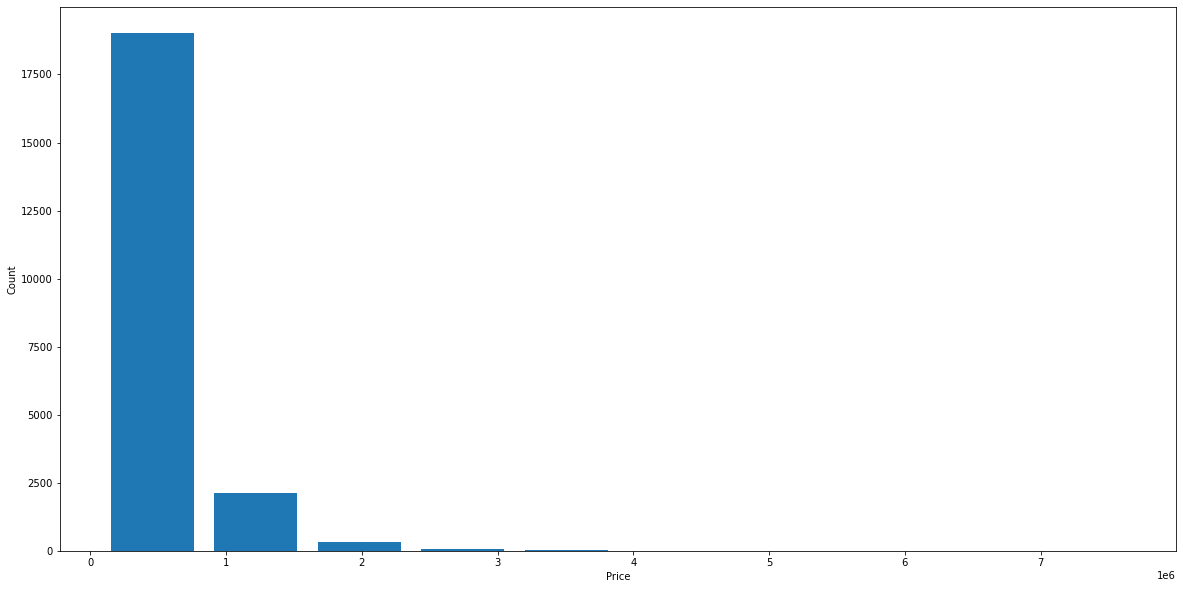

In [71]:
import matplotlib

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.price,rwidth=0.8)
plt.xlabel("Price")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

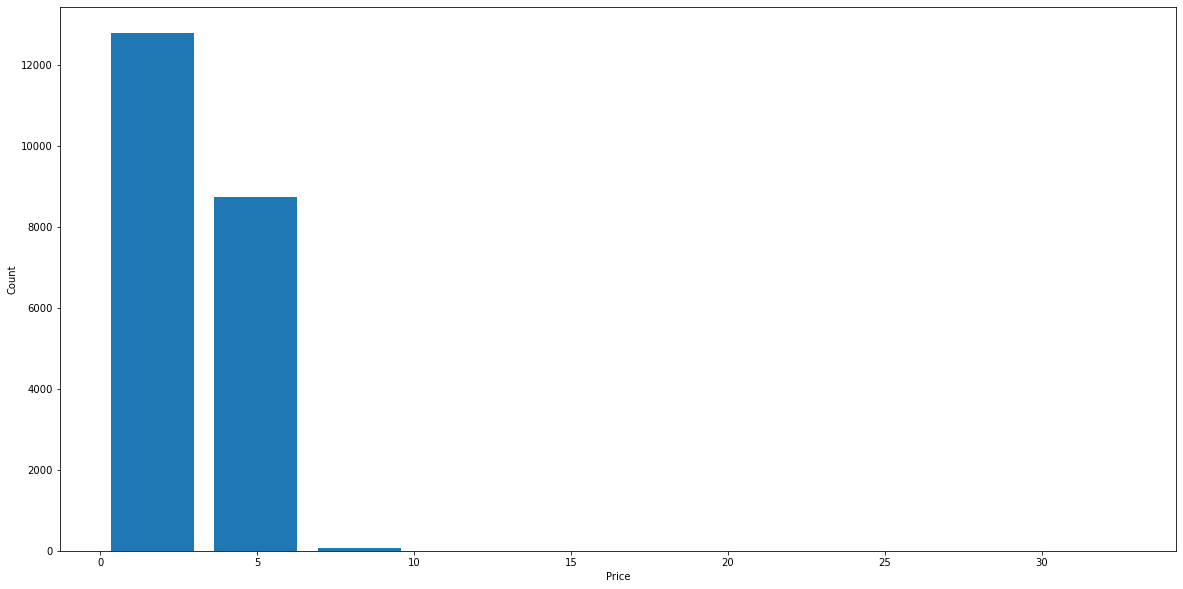

In [72]:
import matplotlib

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.bedrooms,rwidth=0.8)
plt.xlabel("Price")
plt.ylabel("Count")

We can see as price in and count column. As price increases the number of count is seem to be decreasing.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

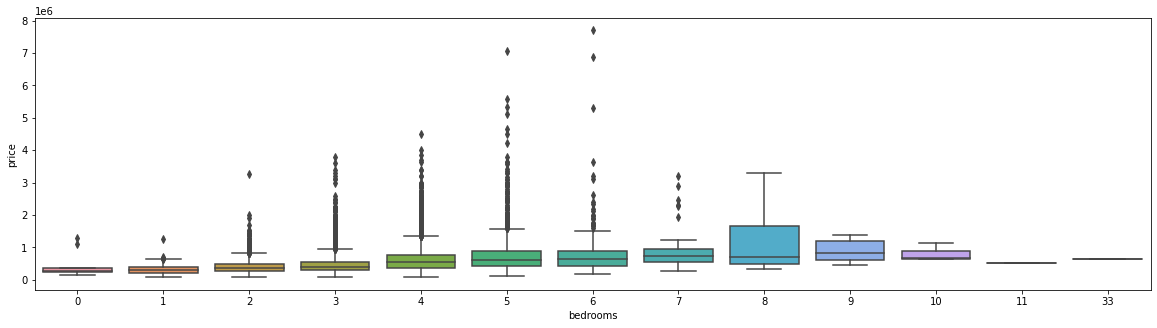

In [73]:
import seaborn as sns
plt.figure(figsize = (20,5))
sns.boxplot(x='bedrooms', y = 'price', data = df2.sort_values('price', ascending = False))

This graph is used for finding outliers of price column. We can see various dots representing outliers.

In [74]:
# identify features and label and seperate it:
features = df2.iloc[ : , 1:8]
target = df2.iloc[ : , :1]

# sanity check
assert features.shape[0] == target.shape[0], " len(features) == len(target)"

In [75]:
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,3,1.00,1180,5650,1.0,1180,1955
1,3,2.25,2570,7242,2.0,2170,1951
2,2,1.00,770,10000,1.0,770,1933
3,4,3.00,1960,5000,1.0,1050,1965
4,3,2.00,1680,8080,1.0,1680,1987
...,...,...,...,...,...,...,...
21570,3,2.50,1530,1131,3.0,1530,2009
21571,4,2.50,2310,5813,2.0,2310,2014
21572,2,0.75,1020,1350,2.0,1020,2009
21573,3,2.50,1600,2388,2.0,1600,2004


In [76]:
target

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21570,360000.0
21571,400000.0
21572,402101.0
21573,400000.0


In [77]:
features.shape

(21575, 7)

In [78]:
target.shape

(21575, 1)

In [79]:
from sklearn.ensemble import RandomForestRegressor
 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(features, target) 

RandomForestRegressor(random_state=0)

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(features, target, test_size = 0.2,random_state=42)
assert x_train.shape[0] == y_train.shape[0]

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state=42)
rfmodel = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rfmodel.score(x_test, y_test)

0.5862930508184263

The accurancy obtained by using random forest is 58%

In [84]:
from sklearn.linear_model import LinearRegression
  
regr = LinearRegression()
  
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.5650135119055203


The accurancy obtained by using linear regression is 56%